In [2]:
import arcgis
from arcgis import *
from arcgis.mapping import MapImageLayer
from getpass import getpass
import warnings
warnings.filterwarnings('ignore')

In [3]:
gis = GIS("https://www.arcgis.com", username="rcmartinb")

Enter password: ········


In [8]:
landsat_item=gis.content.search('title:Multispectral Landsat','Imagery Layer',outside_org=True)[0]

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri>
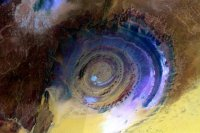

In [9]:
landsat=landsat_item.layers[0]
landsat_item

In [31]:
# aoi = {'spatialReference': {'latestWkid': 3116}, 'type': 'extent', 
#        'xmax': 1100000, 'xmin': 900000, 'ymax': 1100000, 'ymin': 900000}
aoi = {'spatialReference': {'latestWkid': 4326}, 'type': 'extent', 
       'xmax': -74.97529, 'xmin': -76.65139, 'ymax': 5.38407, 'ymin': 5.02532}

arcgis.env.analysis_extent = aoi
# {'xmax': 1100000, 'xmin': 900000, 'ymax': 1100000, 'ymin': 900000,
#                               "spatialReference":{"wkid":3116}}

landsat.extent = aoi

In [21]:
import pandas as pd
from datetime import datetime

selected = landsat.filter_by(where="(Category = 1)",
                             time=[datetime(2017, 11, 15), datetime(2018, 1, 1)],
                             geometry=arcgis.geometry.filters.intersects(aoi))

df = selected.query(out_fields="AcquisitionDate, GroupName, CloudCover, DayOfYear", 
                    order_by_fields="AcquisitionDate").sdf
df['AcquisitionDate'] = pd.to_datetime(df['AcquisitionDate'], unit='ms')
df.tail()

,AcquisitionDate,CloudCover,DayOfYear,GroupName,OBJECTID,SHAPE,Shape_Area,Shape_Length
16,2017-12-20 15:06:46,0.4325,354,LC80070572017354LGN00_MTL,2213294,"{""rings"": [[[-8011392.484999999, 558863.425099...",3.499602e+10,748694.721782
17,2017-12-20 15:07:10,0.5463,354,LC80070582017354LGN00_MTL,2213295,"{""rings"": [[[-8045737.9607, 397407.0047999993]...",3.494005e+10,748065.360521
18,2017-12-27 15:12:32,0.7306,361,LC80080562017361LGN00_MTL,2215698,"{""rings"": [[[-8148700.8576, 720527.8172999993]...",3.510749e+10,749886.986407
19,2017-12-27 15:12:55,0.8518,361,LC80080572017361LGN00_MTL,2215699,"{""rings"": [[[-8183348.6084, 558814.9816000015]...",3.494389e+10,748596.379465
20,2017-12-27 15:13:19,0.8251,361,LC80080582017361LGN00_MTL,2215700,"{""rings"": [[[-8217475.735200001, 397315.074499...",3.490501e+10,747699.242782


In [27]:
df.iloc[16,3]

'LC80070572017354LGN00_MTL'

In [12]:
prefire = landsat.filter_by('OBJECTID=668630') # 2017-11-23 
midfire = landsat.filter_by('OBJECTID=681950') # 2017-12-09 LC08_L1TP_009057_20190903_20190917_01_T1

In [32]:
midfire = landsat.filter_by("GroupName='LC80090572019246LGN00_MTL_MTL'") # 2017-12-09 

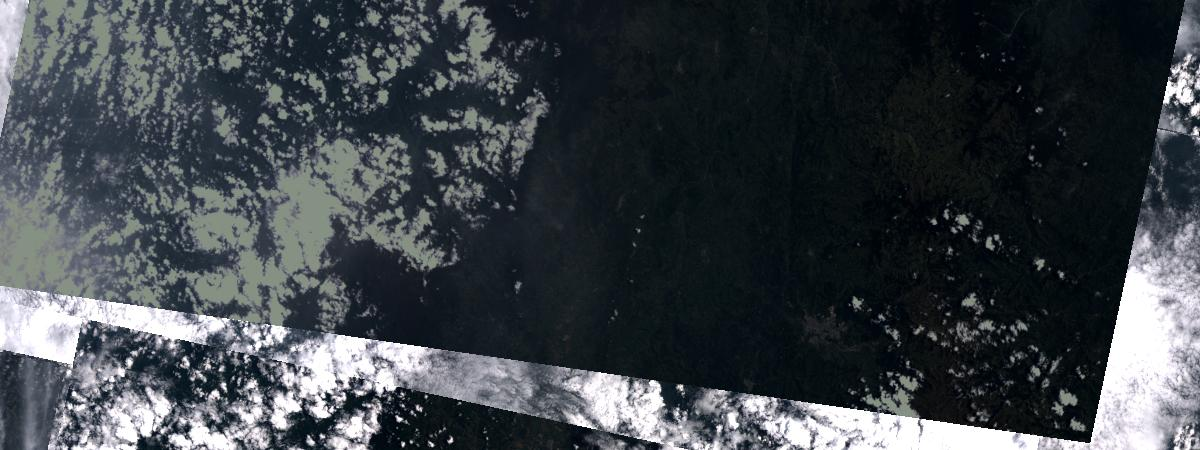

In [34]:
from arcgis.raster.functions import *
extract_band(midfire, [6,5,4])

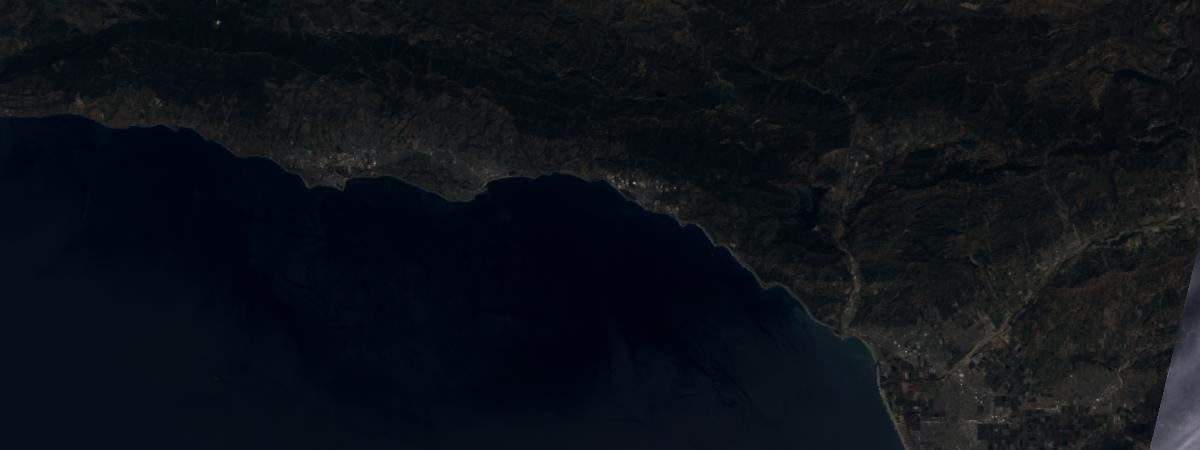

In [14]:
extract_band(prefire, [5,6,2])